# 1. Importación de Librerías y Carga de Datos

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Definir transformaciones para los datos
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Cargar los datos de Fashion MNIST
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Verificar el tamaño del dataset
print(f"Tamaño del conjunto de entrenamiento: {len(trainset)}")
print(f"Tamaño del conjunto de prueba: {len(testset)}")

Tamaño del conjunto de entrenamiento: 60000
Tamaño del conjunto de prueba: 10000


## Comentarios:

- Se realiza los mismos pasos de importar las librerias, realizar las transformaciones y cargar datos de la version original del modelo


# 2. Definir la Arquitectura del Modelo

In [13]:
#Modelo final
class Laplus(nn.Module):
    def __init__(self):
        super(Laplus, self).__init__()
        #capas convolucionales
        #Capa 1 de convolucion
        self.conv1 = nn.Conv2d(1, 64, 5, 1, 2)
        #Capa 2 de convolucion
        self.conv2 = nn.Conv2d(64, 128, 5, 2, 2)
        #Capa 3 de convolucion
        self.conv3 = nn.Conv2d(128, 256, 3, 1)

        #Capas de clasificacion
        self.fc1 = nn.Linear(4096, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

        #Probabilidad de dropout = 55%
        self.dropout = nn.Dropout(0.55)
        
    def forward(self, x):
        x = self.dropout(F.relu(self.conv1(x)))
        x = self.dropout(F.relu(self.conv2(x)))
        x = F.max_pool2d(self.dropout(F.relu(self.conv3(x))), 3)
        
        x = torch.flatten(x, 1)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        output = self.fc3(x)
        return output

#Modelo 1
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Capa 1 de convolucion, 32 kernel tamaño 3x3
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        #Capa 2 de convolucion, 64 kernel tamaño 3x3
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.dropout(F.max_pool2d(x, 2))
        x = torch.flatten(x, 1)
        x = self.dropout(F.relu(self.fc1(x)))
        output = self.fc2(x)
        return output

#Modelo 2
class Fortnite(nn.Module):
    def __init__(self):
        super(Fortnite, self).__init__()
        #Capas convolucionares
        #Capa 1 de convolucion, 16 kernel tamaño 5x5
        self.conv1 = nn.Conv2d(1, 16, 5, 1)
        #Capa 2 de convolucion, 32 kernel de tamaño 5x5
        self.conv2 = nn.Conv2d(16, 32, 5, 1)
        #Capa 3 de convolucion, 48 kernel de tamaño 3x3
        self.conv3 = nn.Conv2d(32, 48, 3, 1)
        #Capa 4 de convolucion, 64 kernel de tamaño 3x3
        self.conv4 = nn.Conv2d(48, 64, 3, 1)

        #Capas fully connected
        #Capa oculta 1 32 nodos
        self.fc1 = nn.Linear(256, 32)
        #Capa de salida 10 nodos
        self.fc2 = nn.Linear(32, 10)

        #Probabilidad de Dropout
        self.dropout = nn.Dropout(0.30)
    
    def forward(self, x):
        #Convolucon 1 y max pool
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 1, 1)
        #Convolucion 2 y max pool
        x = self.dropout(F.max_pool2d(F.relu(self.conv2(x)), 2, 2, 1))
        #Convolucion 3 y max pool
        x = self.dropout(F.max_pool2d(F.relu(self.conv3(x)), 2, 1, 1))
        #Convolucion 4 y max pool
        x = self.dropout(F.max_pool2d(F.relu(self.conv4(x)), 4, 4, 1))
        #Se convierte el mapa de activacion resultante en una matriz vector para la fase de clasificacion
        x = torch.flatten(x, 1)
        #Capa oculta de clasificacion 1
        x = self.dropout(F.relu(self.fc1(x)))
        #Capa de salida
        output = self.fc2(x)
        
        
        return output

warmEpochs = 300
decayEpochs = 30

warmup = lambda epoch: epoch/warmEpochs

model = Laplus()
criterion = nn.CrossEntropyLoss(label_smoothing = 0.003)
optimizer = optim.Adam(model.parameters(), lr=0.001)

warmScheduler = optim.lr_scheduler.LambdaLR(optimizer, warmup)
cosinScheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, decayEpochs)

seqScheduler = optim.lr_scheduler.SequentialLR(optimizer, schedulers=[warmScheduler, cosinScheduler], milestones=[300])

## Comentarios:
- Se define la misma arquitectura del modelo 3 "Lapu" u sus mismas funciones
- Igualmente se instancia el modelo para su entrenamiento
- Se instancia la funcion de perdida Cross Entropy Loss, esta vez se aplicara label smoothing para incrementar la generalizacion del modelo, para ello se debe definir un valor en un rango normal de [0.0 y 1.0], se decidio un valor de 0.3
- 

# 3. Entrenamiento del Modelo

Para el entrenamiento, se asigna el modelo y las entradas al procesamiento de cuda para ser procesados por el GPU y acelerar el entrenamiento

In [14]:
model.to('cuda')
warmSteps = 0
train_losses = []  # Lista para almacenar las pérdidas de entrenamiento
val_losses = []    # Lista para almacenar las pérdidas de validación

for epoch in range(30):
    running_loss = 0.0
    train_loss = 0.0
    i = 0
    for images, labels in trainloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_loss += loss.item()
        
        if warmSteps < 300:
            seqScheduler.step()
            warmSteps+= 1
            
        i+= 1
        if i % 100 == 99:    # Imprimir cada 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            print(optimizer.param_groups[0]['lr'])
            running_loss = 0.0

    train_losses.append(train_loss / len(trainloader))  # Guardar la pérdida de entrenamiento

    # Evaluación en el conjunto de validación
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(testloader))  # Guardar la pérdida de validación
    model.train()

    seqScheduler.step()

print('Finished Laplus Training')

Epoch 1, Batch 100, Loss: 1.945
0.00033
Epoch 1, Batch 200, Loss: 1.113
0.0006633333333333334
Epoch 1, Batch 300, Loss: 0.823
0.0009966666666666668
Epoch 1, Batch 400, Loss: 0.717
0.001
Epoch 1, Batch 500, Loss: 0.639
0.001
Epoch 1, Batch 600, Loss: 0.600
0.001
Epoch 1, Batch 700, Loss: 0.577
0.001
Epoch 1, Batch 800, Loss: 0.558
0.001
Epoch 1, Batch 900, Loss: 0.559
0.001
Epoch 2, Batch 100, Loss: 0.495
0.0009972609476841367
Epoch 2, Batch 200, Loss: 0.502
0.0009972609476841367
Epoch 2, Batch 300, Loss: 0.499
0.0009972609476841367
Epoch 2, Batch 400, Loss: 0.500
0.0009972609476841367
Epoch 2, Batch 500, Loss: 0.501
0.0009972609476841367
Epoch 2, Batch 600, Loss: 0.493
0.0009972609476841367
Epoch 2, Batch 700, Loss: 0.477
0.0009972609476841367
Epoch 2, Batch 800, Loss: 0.463
0.0009972609476841367
Epoch 2, Batch 900, Loss: 0.480
0.0009972609476841367
Epoch 3, Batch 100, Loss: 0.465
0.0009890738003669028
Epoch 3, Batch 200, Loss: 0.463
0.0009890738003669028
Epoch 3, Batch 300, Loss: 0.44

## Comentarios:

- Se entrena el modelo durante 10 épocas.
- Se itera sobre los datos de entrenamiento, calculando las predicciones y actualizando los pesos del modelo.
- Se imprime la pérdida de entrenamiento cada 100 mini-lotes.

# 4. Evaluación del Modelo

In [15]:
correctTrain = 0
totalTrain = 0
correctTest = 0
totalTest = 0
with torch.no_grad():
    model.eval()
    for images, labels in trainloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = F.log_softmax(model(images), dim = 1)
        _, predicted = torch.max(outputs.data, 1)
        totalTrain += labels.size(0)
        correctTrain += (predicted == labels).sum().item()

    for images, labels in testloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = F.log_softmax(model(images), dim = 1)
        _, predicted = torch.max(outputs.data, 1)
        totalTest += labels.size(0)
        correctTest += (predicted == labels).sum().item()

model.train()

print(f'Accuracy on the train set for Laplus: {100 * correctTrain / totalTrain:.2f}%')
print(f'Accuracy on the test set for Laplus: {100 * correctTest / totalTest:.2f}%')

Accuracy on the train set for Laplus: 94.58%
Accuracy on the test set for Laplus: 92.52%


## Comentarios:

- Se evalúa el modelo en el conjunto de prueba sin calcular gradientes.
- Se calculan las predicciones y se compara con las etiquetas reales para calcular la precisión.
- Se imprime la precisión del modelo en el conjunto de prueba.


# 5. Visualización de Mapas de Activación

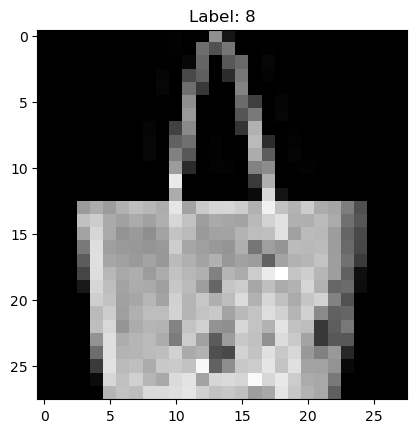

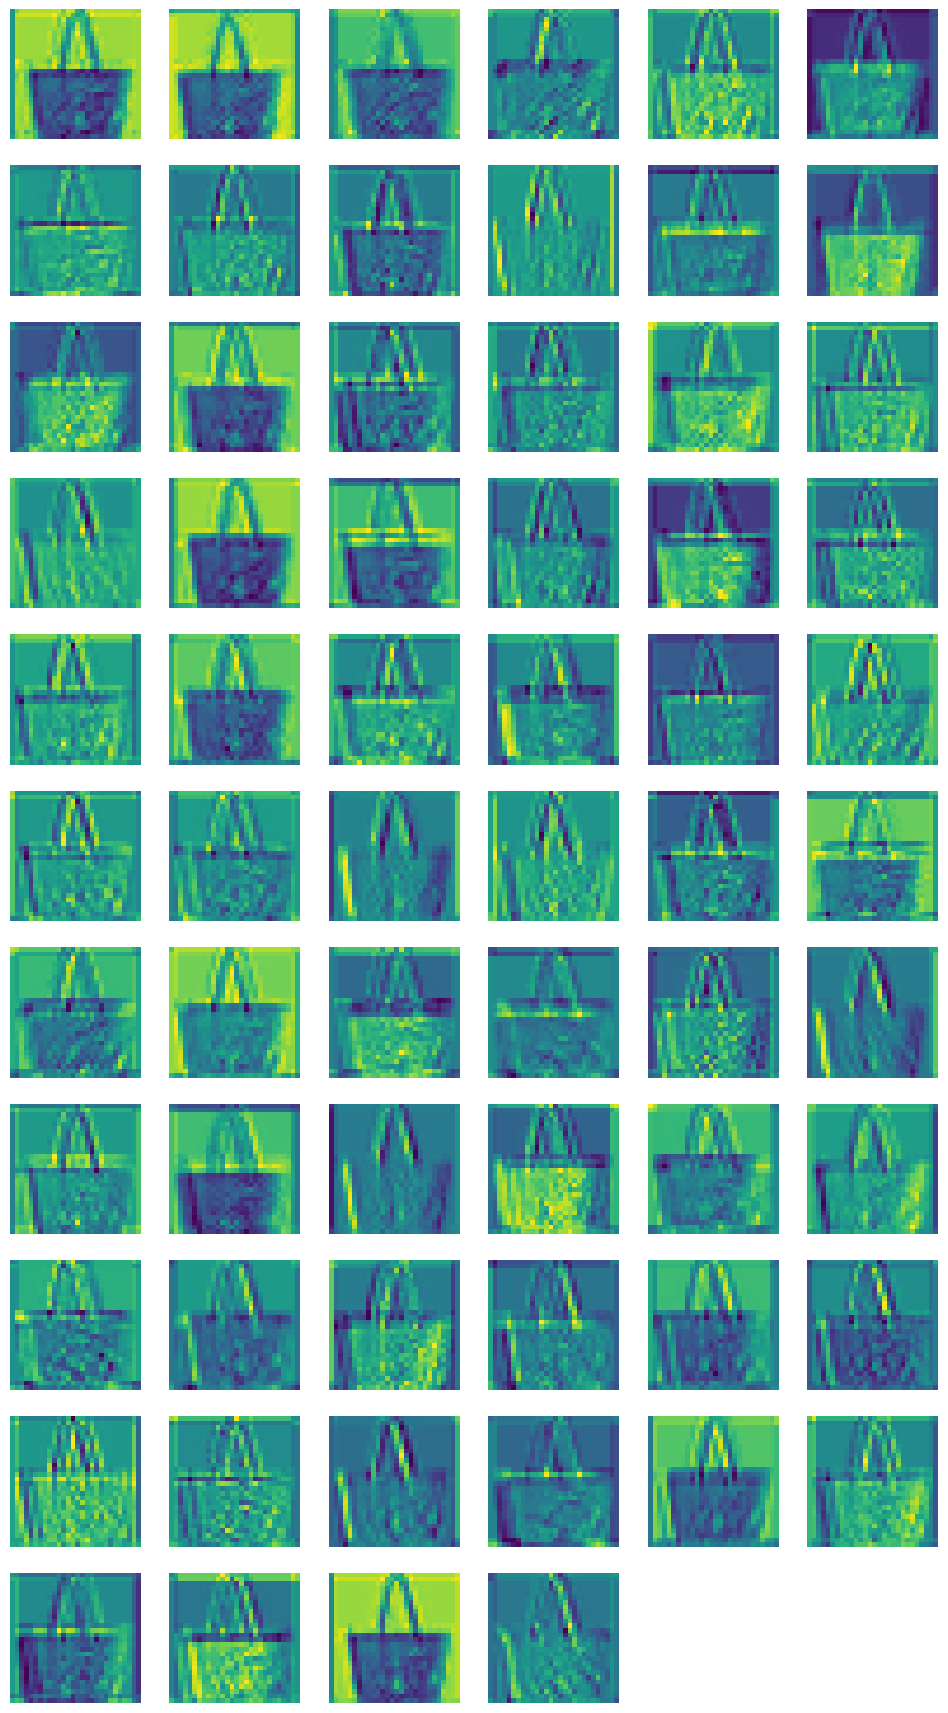

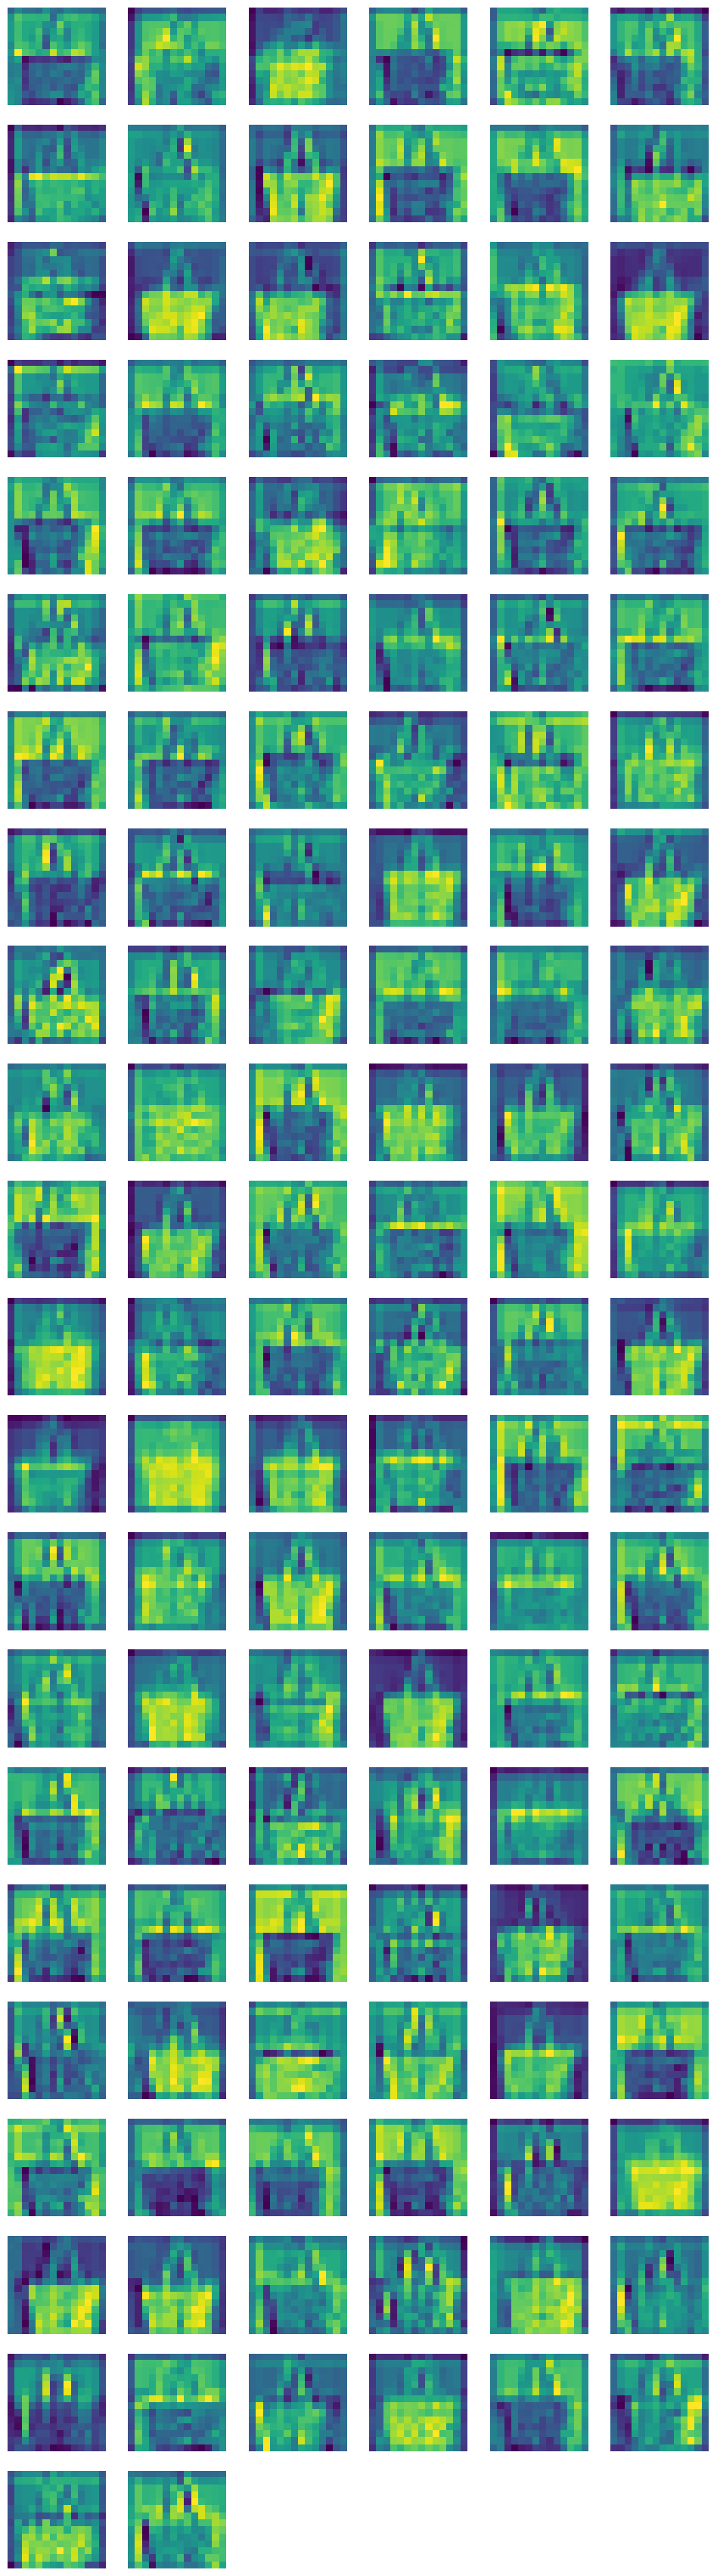

In [16]:
model.to('cpu')

def get_activation(layer, input):
    return layer(input)

# Función para visualizar los mapas de activación
def plot_activations(activation):
    num_activations = activation.shape[1]
    size = activation.shape[2]
    num_cols = 6
    num_rows = num_activations // num_cols + 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*2))
    for i, ax in enumerate(axes.flat):
        if i < num_activations:
            img = activation[0, i].detach().numpy()
            ax.imshow(img, cmap='viridis')
        ax.axis('off')
    plt.show()

# Función para visualizar las activaciones de una imagen específica
def visualize_image_activations(image_index):
    # Seleccionar una imagen de prueba
    dataiter = iter(testloader)
    for _ in range(image_index + 1):
        images, labels = next(dataiter)  # Usar la función next() de Python para obtener el siguiente elemento

    test_image = images[0].unsqueeze(0)

    # Mostrar la imagen de prueba
    plt.imshow(test_image[0].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[0].item()}")
    plt.show()

    # Obtener las activaciones de las capas convolucionales
    activations = []
    x = test_image
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            x = get_activation(layer, x)
            activations.append(x)
        elif isinstance(layer, nn.MaxPool2d) or isinstance(layer, nn.ReLU) or isinstance(layer, nn.Dropout):
            x = get_activation(layer, x)
        elif isinstance(layer, nn.Linear):
            break  # Detenerse antes de las capas totalmente conectadas

    # Visualizar los mapas de activación de las capas convolucionales
    plot_activations(activations[0])
    plot_activations(activations[1])

# Llamar a la función con el índice de la imagen que deseas visualizar
visualize_image_activations(4)  # Cambia el índice para visualizar diferentes imágenes


## Comentarios:

- Se define una función get_activation para obtener las activaciones de una capa específica.
- Se selecciona una imagen de prueba del conjunto de datos de prueba.
- Se pasan los datos a través del modelo para obtener las activaciones de las capas convolucionales.
- Se define una función plot_activations para visualizar los mapas de activación.
- Se visualizan los mapas de activación de la primera y segunda capa convolucional.

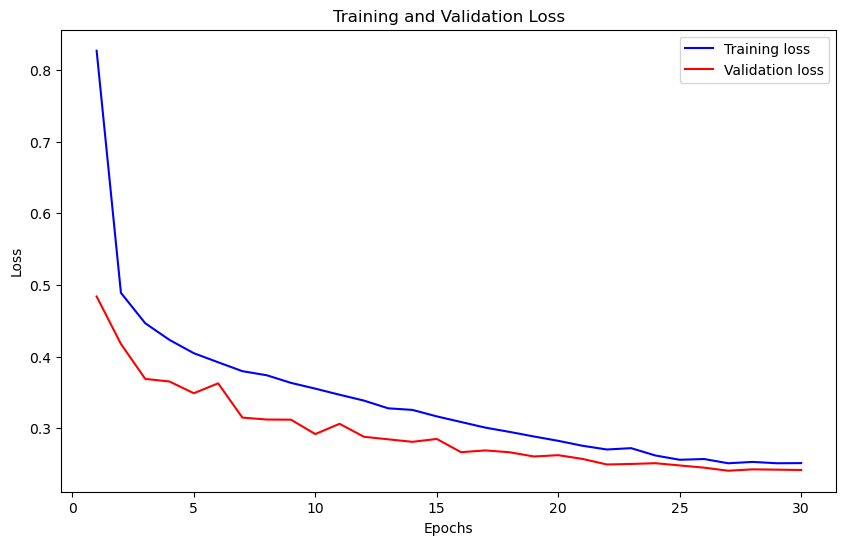

In [17]:
# Nueva sección añadida para graficar las pérdidas
import matplotlib.pyplot as plt

# Utiliza las listas que ya tienes
train_loss = train_losses  # Asegúrate de que esta variable exista
val_loss = val_losses      # Asegúrate de que esta variable exista
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()